In [51]:
import pandas as pd
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-1:])
df_train =df.drop(df.index[-12:])
df_train =df.drop(df.index[-12:])
#*test dataframe bez randomizace
df_test = df.drop(df.index[:-12])
df_test = df.drop(df.index[:-12])
df_test_graf = df_test

#* definovat data
X = df[["aktivni-1", "nove-1","zbytek-1"]]
y = df[['aktivni']]

Koeficienty korelace

In [38]:
parametry = ["aktivni-1", "nove-1","zbytek-1"]
for parametr in parametry:
    corr_coef = df['aktivni'].corr(df[parametr])
    print(f"korelační koeficient aktivni a {parametr}: {corr_coef}")
#!koeficienty vyjdou monohem jinak u detrendovanyho dataframu

korelační koeficient aktivni a aktivni-1: -0.11798729894148087
korelační koeficient aktivni a nove-1: -0.26291384346688035
korelační koeficient aktivni a zbytek-1: -0.03193496775828529


Grafy

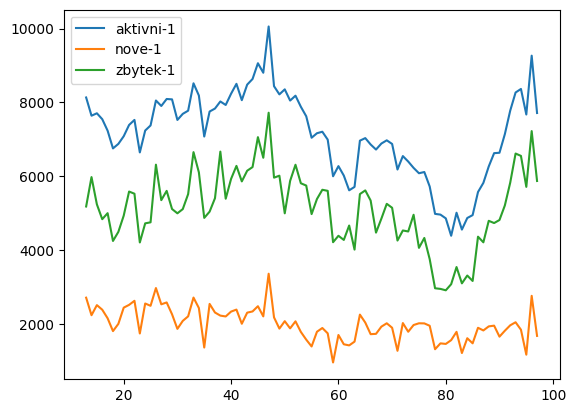

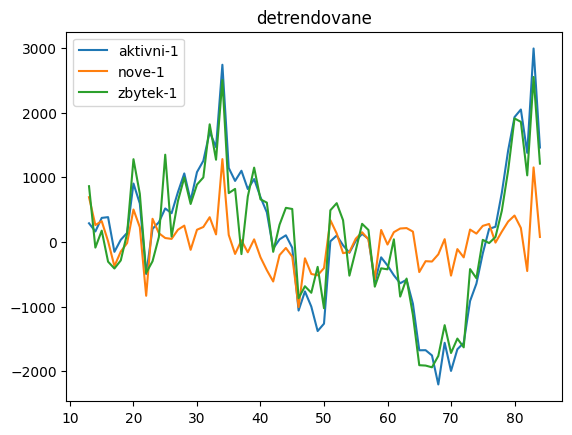

In [48]:
plt.plot(df.index, df['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df['nove-1'], label='nove-1')
plt.plot(df.index, df['zbytek-1'], label='zbytek-1')
plt.legend()
plt.show()
#>> detrendovane data
df_detrend = df
df_detrend["aktivni-1"] = pd.Series(scipy.signal.detrend(df['aktivni-1']))
df_detrend["nove-1"] = pd.Series(scipy.signal.detrend(df['nove-1']))
df_detrend["zbytek-1"] = pd.Series(scipy.signal.detrend(df['zbytek-1']))
plt.title('detrendovane')
plt.plot(df.index, df_detrend['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_detrend['nove-1'], label='nove-1')
plt.plot(df.index, df_detrend['zbytek-1'], label='zbytek-1')
plt.legend()
plt.show()


Detrendování dat

In [53]:
import pandas as pd
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-1:])
for parametr in parametry:
    df_detrend[parametr] = pd.Series(scipy.signal.detrend(df[parametr]))

model na detrendovaných datech